## First code for our baseline

In [ ]:
import pandas as pd
import numpy as np
df= pd.read_csv("node_text_embeddings_cleaned.csv")

### Embeddings generated by node2vec(embeddingvector) and GIST-Small(text_vectors)

In [ ]:
df.head()

,embeddingVector,id,text_vectors,political_leaning
0,"[0.0035458847414702177, 0.0057817851193249226,...",52898231,"[-0.03461906, 0.03441137, -0.02845796, -0.0304...",1
1,"[0.0035500838421285152, -0.002165608573704958,...",3239377,"[-0.0117352558, 0.0363212936, -0.00773911085, ...",0
2,"[0.003548684064298868, 0.0004835226573050022, ...",52923954,"[0.00741601037, 0.0180580188, -0.00967473071, ...",1
3,"[0.0035864762030541897, 0.007081980817019939, ...",79068614,"[-0.03248248, 0.03960977, 0.04244677, -0.02519...",3
4,"[0.003589275758713484, 0.001783718355000019, 0...",79069943,"[-0.080129683, 0.0270859562, -0.0130568352, -0...",3


In [ ]:
df["embeddingVector"] = df["embeddingVector"].apply(eval)
df["text_vectors"] = df["text_vectors"].apply(lambda x: np.fromstring(x.strip('[]'), sep = ','))

In [ ]:
df.head()

,embeddingVector,id,text_vectors,political_leaning
0,"[0.0035458847414702177, 0.0057817851193249226,...",52898231,"[-0.03461906, 0.03441137, -0.02845796, -0.0304...",1
1,"[0.0035500838421285152, -0.002165608573704958,...",3239377,"[-0.0117352558, 0.0363212936, -0.00773911085, ...",0
2,"[0.003548684064298868, 0.0004835226573050022, ...",52923954,"[0.00741601037, 0.0180580188, -0.00967473071, ...",1
3,"[0.0035864762030541897, 0.007081980817019939, ...",79068614,"[-0.03248248, 0.03960977, 0.04244677, -0.02519...",3
4,"[0.003589275758713484, 0.001783718355000019, 0...",79069943,"[-0.080129683, 0.0270859562, -0.0130568352, -0...",3


### Data Viz for text embeddings

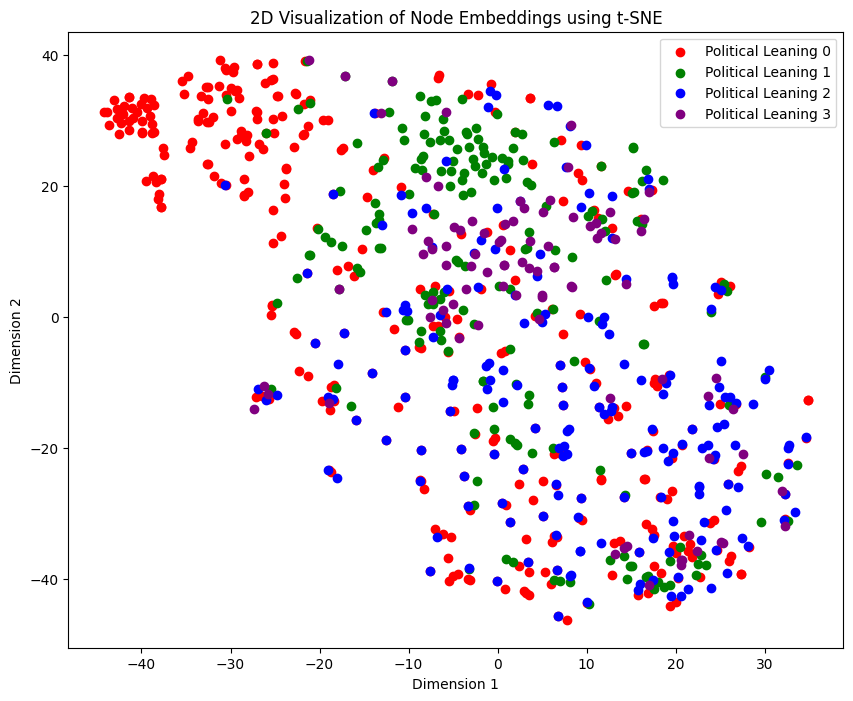

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


embedding_matrix = np.stack(df['text_vectors'].values)

# Initialize and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embedding_matrix)

# Plot the result
plt.figure(figsize=(10, 8))

# Define colors (You can choose different colors)
colors = ['red', 'green', 'blue', 'purple']

for i in range(4): # Since you have 4 political leanings (0 to 3)
    idx = np.where(df['political_leaning'] == i)
    plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], c=colors[i], label=f'Political Leaning {i}')

plt.title('2D Visualization of Node Embeddings using t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### prediction on text embeddings only

In [ ]:
### Logistic Regression

political_leaning = df['political_leaning'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings_2d, political_leaning, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.46296296296296297
Confusion Matrix:
[[49  6 13  0]
 [17  9  7  0]
 [18  6 17  0]
 [ 6  9  5  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.72      0.62        68
           1       0.30      0.27      0.29        33
           2       0.40      0.41      0.41        41
           3       0.00      0.00      0.00        20

    accuracy                           0.46       162
   macro avg       0.31      0.35      0.33       162
weighted avg       0.39      0.46      0.42       162



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
### Random forest classifier


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming df['political_leaning'] contains your target variable
political_leaning = df['political_leaning'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings_2d, political_leaning, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest.predict(X_test)

# Evaluate the modelA
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.49382716049382713
Confusion Matrix:
[[45  8 14  1]
 [12 16  2  3]
 [16  6 13  6]
 [ 5  6  3  6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.66      0.62        68
           1       0.44      0.48      0.46        33
           2       0.41      0.32      0.36        41
           3       0.38      0.30      0.33        20

    accuracy                           0.49       162
   macro avg       0.45      0.44      0.44       162
weighted avg       0.48      0.49      0.48       162



### data viz on node embeddings

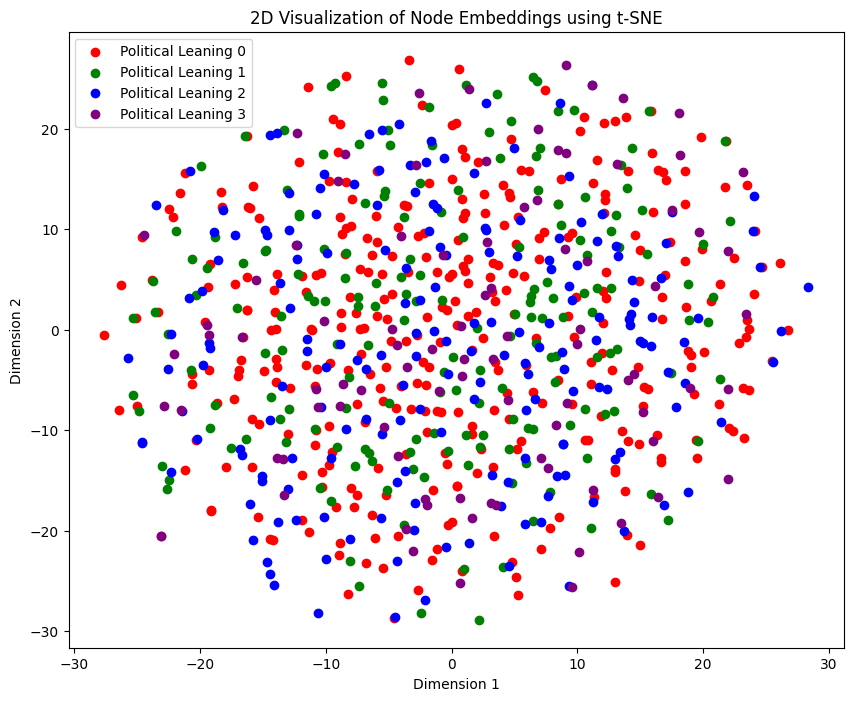

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


embedding_matrix = np.stack(df['embeddingVector'].values)

# Initialize and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embedding_matrix)

# Plot the result
plt.figure(figsize=(10, 8))

# Define colors (You can choose different colors)
colors = ['red', 'green', 'blue', 'purple']

for i in range(4): # Since you have 4 political leanings (0 to 3)
    idx = np.where(df['political_leaning'] == i)
    plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], c=colors[i], label=f'Political Leaning {i}')

plt.title('2D Visualization of Node Embeddings using t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


### prediction on node embeddings only

In [ ]:
political_leaning = df['political_leaning'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings_2d, political_leaning, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.41975308641975306
Confusion Matrix:
[[68  0  0  0]
 [33  0  0  0]
 [41  0  0  0]
 [20  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.42      1.00      0.59        68
           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00        20

    accuracy                           0.42       162
   macro avg       0.10      0.25      0.15       162
weighted avg       0.18      0.42      0.25       162



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming df['political_leaning'] contains your target variable
political_leaning = df['political_leaning'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings_2d, political_leaning, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest.predict(X_test)

# Evaluate the modelA
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.35802469135802467
Confusion Matrix:
[[40  8 17  3]
 [21  7  4  1]
 [14 15  9  3]
 [ 8  3  7  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.59      0.53        68
           1       0.21      0.21      0.21        33
           2       0.24      0.22      0.23        41
           3       0.22      0.10      0.14        20

    accuracy                           0.36       162
   macro avg       0.29      0.28      0.28       162
weighted avg       0.33      0.36      0.34       162



## Evaluate models using node and text embeddings together concatenated

In [1]:
import pandas as pd

# Load the dataset
file_path = 'node_text_embeddings_cleaned.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,embeddingVector,id,text_vectors,political_leaning
0,"[0.0035458847414702177, 0.0057817851193249226,...",52898231,"[-0.03461906, 0.03441137, -0.02845796, -0.0304...",1
1,"[0.0035500838421285152, -0.002165608573704958,...",3239377,"[-0.0117352558, 0.0363212936, -0.00773911085, ...",0
2,"[0.003548684064298868, 0.0004835226573050022, ...",52923954,"[0.00741601037, 0.0180580188, -0.00967473071, ...",1
3,"[0.0035864762030541897, 0.007081980817019939, ...",79068614,"[-0.03248248, 0.03960977, 0.04244677, -0.02519...",3
4,"[0.003589275758713484, 0.001783718355000019, 0...",79069943,"[-0.080129683, 0.0270859562, -0.0130568352, -0...",3


In [2]:
from sklearn.preprocessing import StandardScaler
from ast import literal_eval

# Convert string representations of lists to actual lists
df['embeddingVector'] = df['embeddingVector'].apply(literal_eval)
df['text_vectors'] = df['text_vectors'].apply(literal_eval)

# Combine the embeddings into a single list of features for each sample
df['combined_features'] = df.apply(lambda row: row['embeddingVector'] + row['text_vectors'], axis=1)

# Extract combined features into a separate DataFrame for scaling
features_df = pd.DataFrame(df['combined_features'].tolist())

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features_df)

# Check the shape of the normalized features to ensure everything looks correct
normalized_features.shape


(806, 448)

In [3]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality while retaining 95% of the variance
pca = PCA(n_components=0.95)
reduced_features = pca.fit_transform(normalized_features)

# Check the new shape of the features
reduced_features.shape

(806, 239)

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define the target variable
y = df['political_leaning']

# Split the dataset into training and testing sets to initially train and validate the models
X_train, X_test, y_train, y_test = train_test_split(reduced_features, y, test_size=0.2, random_state=42)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
grad_boost = GradientBoostingClassifier(random_state=42)

# List of models for easier iteration
models = [log_reg, random_forest, grad_boost]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Use cross-validation to evaluate each model
cv_scores = {}
for model, name in zip(models, model_names):
    scores = cross_val_score(model, reduced_features, y, cv=5)
    cv_scores[name] = scores

cv_scores


{'Logistic Regression': array([0.4691358 , 0.55900621, 0.54658385, 0.50931677, 0.49068323]),
 'Random Forest': array([0.46296296, 0.40372671, 0.44720497, 0.44720497, 0.42236025]),
 'Gradient Boosting': array([0.48765432, 0.48447205, 0.47826087, 0.47826087, 0.49689441])}

## Evaluate models using node and text embeddings independently

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from ast import literal_eval

# Load the dataset
df = pd.read_csv('node_text_embeddings_cleaned.csv')

# Convert string representations of lists to actual lists
df['embeddingVector'] = df['embeddingVector'].apply(literal_eval)
df['text_vectors'] = df['text_vectors'].apply(literal_eval)

# Normalize and reduce dimensionality of node embeddings
node_features = pd.DataFrame(df['embeddingVector'].tolist())
node_scaler = StandardScaler()
normalized_node_features = node_scaler.fit_transform(node_features)
pca_node = PCA(n_components=0.95)
reduced_node_features = pca_node.fit_transform(normalized_node_features)

# Normalize and reduce dimensionality of text embeddings
text_features = pd.DataFrame(df['text_vectors'].tolist())
text_scaler = StandardScaler()
normalized_text_features = text_scaler.fit_transform(text_features)
pca_text = PCA(n_components=0.95)
reduced_text_features = pca_text.fit_transform(normalized_text_features)

# Define the target variable
y = df['political_leaning']

# Model initialization
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
grad_boost = GradientBoostingClassifier(random_state=42)
models = [log_reg, random_forest, grad_boost]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Function to evaluate models
def evaluate_models(features, y, models, model_names):
    cv_scores = {}
    for model, name in zip(models, model_names):
        scores = cross_val_score(model, features, y, cv=5)
        cv_scores[name] = scores
    return cv_scores

# Evaluate models on node embeddings
node_cv_scores = evaluate_models(reduced_node_features, y, models, model_names)
print("Node Embeddings CV Scores:")
print(node_cv_scores)

# Evaluate models on text embeddings
text_cv_scores = evaluate_models(reduced_text_features, y, models, model_names)
print("\nText Embeddings CV Scores:")
print(text_cv_scores)


Node Embeddings CV Scores:
{'Logistic Regression': array([0.37037037, 0.38509317, 0.37888199, 0.33540373, 0.37888199]), 'Random Forest': array([0.40123457, 0.41614907, 0.43478261, 0.39751553, 0.42236025]), 'Gradient Boosting': array([0.33950617, 0.40993789, 0.42236025, 0.37267081, 0.37888199])}

Text Embeddings CV Scores:
{'Logistic Regression': array([0.48765432, 0.54037267, 0.52173913, 0.54037267, 0.52795031]), 'Random Forest': array([0.41975309, 0.44720497, 0.45962733, 0.38509317, 0.44099379]), 'Gradient Boosting': array([0.46296296, 0.47826087, 0.47204969, 0.44099379, 0.52173913])}
